In [11]:
import netCDF4
import numpy as np
import pandas as pd
from statistics import stdev
from datetime import datetime
import matplotlib.dates as md
import matplotlib.pyplot as plt

In [12]:
# Specify the NetCDF file to work with
# This example file is a month's worth of data
# from glider 538 in the Irminger Sea
nc_file = "gi_538-20220628T1727_7e09_6e6f_3df0.nc"

In [13]:
# Load in the NetCDF file 
nc = netCDF4.Dataset(nc_file)

In [14]:
# Optional: view the NetCDF file metadata
#print(nc.variables)
# Optional: view the metadata for a specific variable, e.g. 'temperature'
#print(nc['temperature'])

In [15]:
# Isolate the time, pressure and temperature data
time = nc['time'][:].data
pressure = nc['pressure'][:].data
temperature = nc['temperature'][:].data

In [16]:
# Load the data into a Pandas dataframe
df = pd.DataFrame()
df['time'] = time
df['pressure'] = pressure
df['temperature'] = temperature

In [17]:
# Gliders store time as "seconds since 1970-01-01T00:00:00"
# So we have to convert to a more usable time base
df['date'] = pd.to_datetime(df['time'], unit='s')

In [18]:
# Sort and clean up the dataframe by dropping nans
df = df.sort_values(by=['time'])
df = df.replace([np.inf, -np.inf], np.nan)
df = df.dropna()

In [21]:
# Determine min/max temperature values for colorbar plotting
# This example just uses the mean +/- 3 standard deviations
# for the color bar range
temp_min = df['temperature'].mean() + stdev(df['temperature'])*3
temp_max = df['temperature'].mean() - stdev(df['temperature'])*3

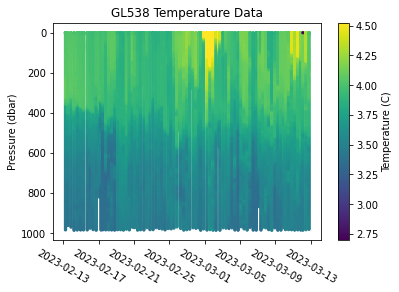

In [22]:
# Create a color scatter of Temperature data
# Assign x, y, and c (color) data to plot
x = df['date']
y = df['pressure']
c = df['temperature']

# Assign v-min and v-max for colorbar
vmin = temp_min
vmax = temp_max

# Assign a color map and plot the data
cm = plt.cm.get_cmap('viridis')
sc = plt.scatter(x, y, c=c, s=5, cmap=cm, vmin=vmin, vmax=vmax)

# Invert the y-axis
plt.gca().invert_yaxis()

# Add a color bar
cbar = plt.colorbar(sc)

# Rotate and shorten the x-ticks
xfmt = md.DateFormatter('%Y-%m-%d')
plt.gca().xaxis.set_major_formatter(xfmt)
new_ticks = plt.xticks(rotation=-30)

# Add labels and title
plt.ylabel('Pressure (dbar)')
plt.title('GL538 Temperature Data')
cbar.set_label('Temperature (C)')